# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on thier medical attributes

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease ?

## 2. Data 

This data came from kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

* age - age in years
* sex - (1 = male, 0 = female)
* cp chest pain type
    * 0: Typical angina
    * 1: Atypical angina
    * 2: Non-anginal pain
    * 3: Asymptomatic
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true, 0 = false)
* restecg - resting electrocardiographic result
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    * 2: Possible or definite left ventricular hypertrophy
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes, 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
    * 0: Upsloping
    * 1: Flatsloping
    * 2: Downslopings
* ca - number of major vessels (0-3) coloured by flourosopy
* thal - thalium stress result (1,3 = normal, 6 = fixed defect, 7 = reversable defect)
* target - have disease or not (1 = yes, 0 = no) : Predicted attribute

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [91]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

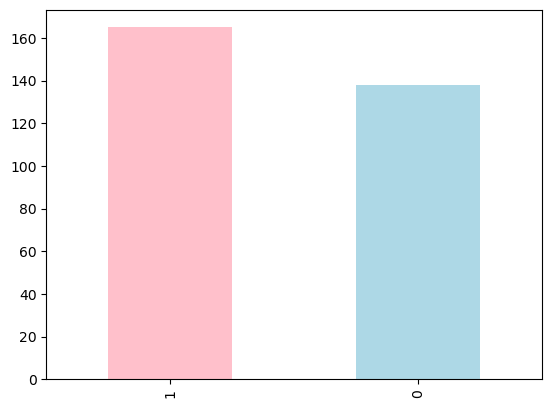

In [6]:
df["target"].value_counts().plot(kind="bar", color=["pink","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Checking if there are any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


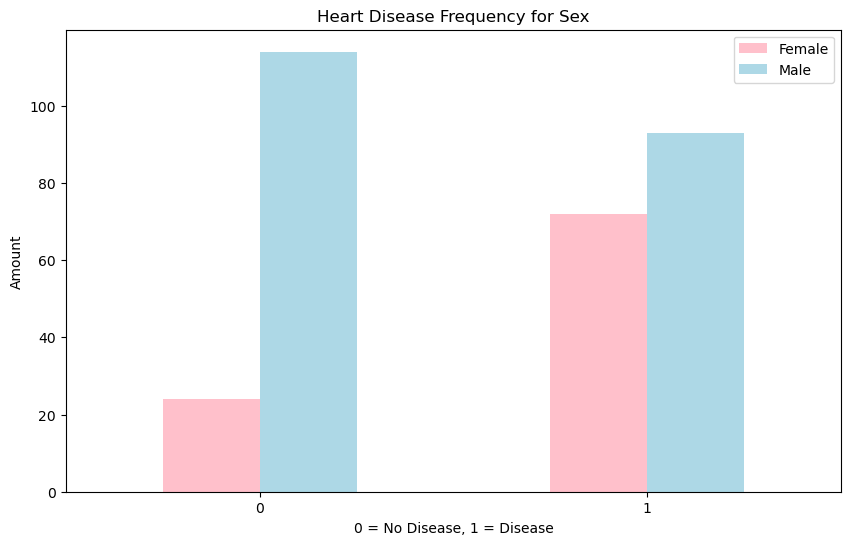

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6),color=["pink","lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0); # rotating the bottom 'x' words to show up vertically instead of being shown horizontally

### Age vs Max Heart Rate for Heart Disease

In [17]:
df["thalach"].value_counts() # 91 different values, so plotting a bar graph is not a good idea

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

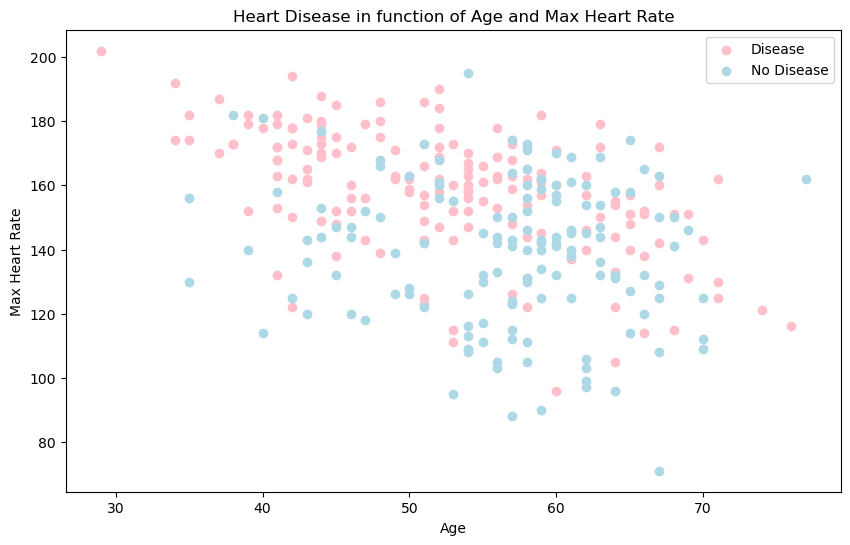

In [24]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="pink")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

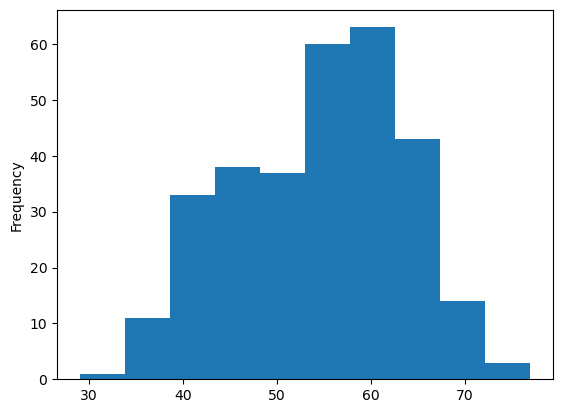

In [25]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequeny per Chest Pain Type

cp chest pain type
   * 0: Typical angina
   * 1: Atypical angina
   * 2: Non-anginal pain
   * 3: Asymptomatic

In [27]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


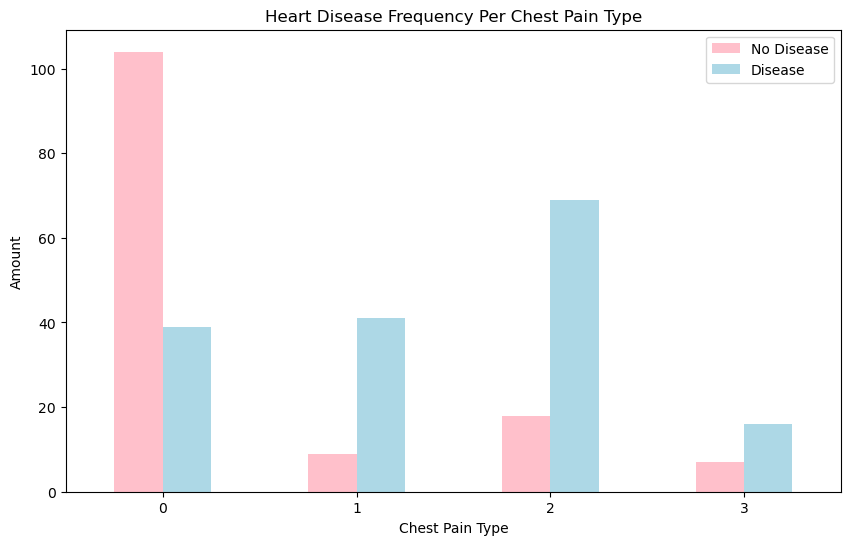

In [29]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(10,6),color=["pink","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0);

In [30]:
# Make a coorelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


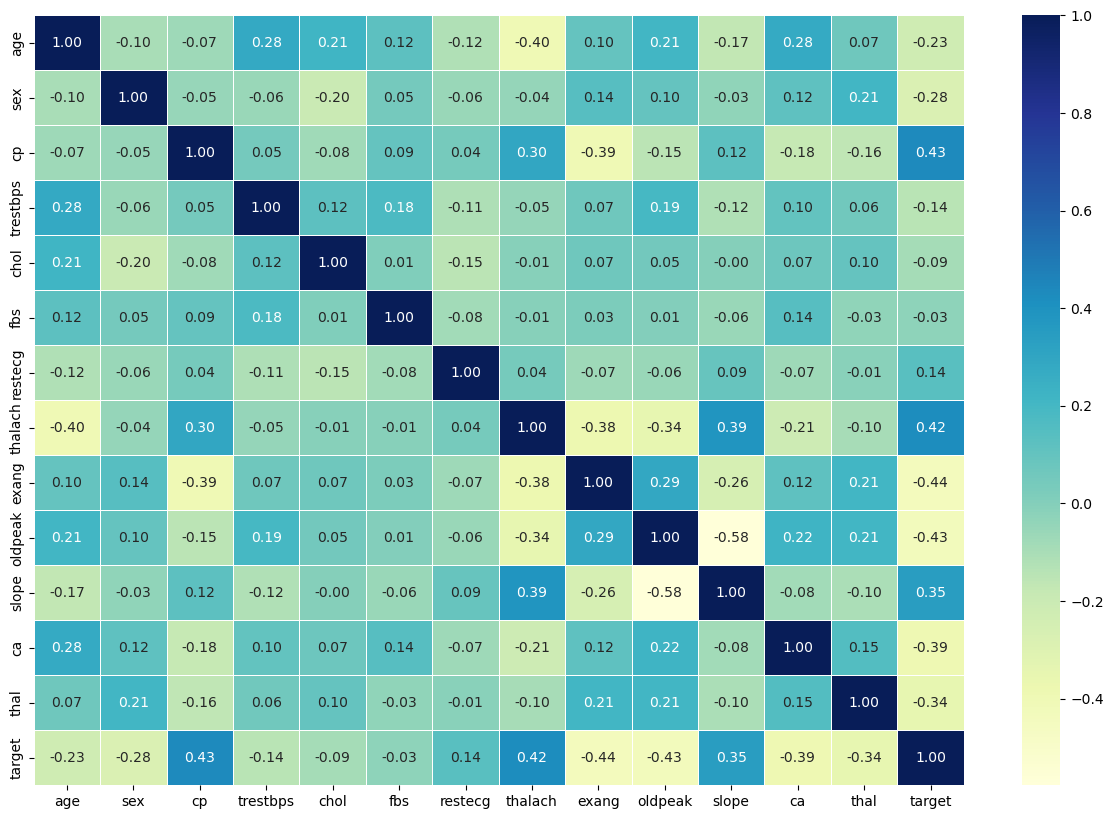

In [31]:
# Let's make our coorelation matrix visual: coorelation means comparing columns
# Negative coorelation = a relationship between 2 varaibles in which one variable increase as the other decreases
# Positive coorelation = a relationship between 2 variables in which one variable increase so does the other increase
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,# We want to annotate it so we are setting it to true
                linewidth = 0.5,
                fmt = ".2f", # Format - upto 2 decimal places
                cmap = "YlGnBu") # Yellow-Green-Blue 

## 5. Modelling

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
# Split the data into x and y 
x = df.drop("target", axis =1 )
y = df["target"]

# Split data into train and test sets
np.random.seed(22)

# Split the data into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [34]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3


In [35]:
y_train, len(y_train)

(158    1
 46     1
 131    1
 172    0
 71     1
       ..
 14     1
 146    1
 84     1
 300    0
 132    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got out data split into training an test sets, it's time to build a machine learning model

We'll train it (find the patters) on the training set.

And we'll test it (use the patterns) on the test set

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifiers
3. Random Forest Classifier

In [54]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create  a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train :  training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(35)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [55]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.7868852459016393}

## Model comparison

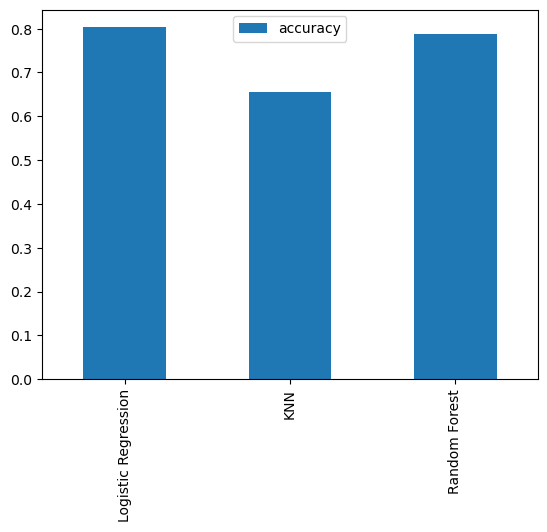

In [56]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model...

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [66]:
import warnings

# Ignore the specific FutureWarning in scikit-learn's KNeighborsClassifier
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors._classification")

In [67]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [68]:
train_scores

[1.0,
 0.8264462809917356,
 0.7933884297520661,
 0.756198347107438,
 0.7727272727272727,
 0.7479338842975206,
 0.7396694214876033,
 0.7396694214876033,
 0.7396694214876033,
 0.7355371900826446,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6983471074380165,
 0.7148760330578512,
 0.7066115702479339,
 0.7024793388429752,
 0.71900826446281,
 0.6818181818181818,
 0.7066115702479339]

In [69]:
test_scores

[0.5573770491803278,
 0.5737704918032787,
 0.639344262295082,
 0.5737704918032787,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082,
 0.5409836065573771,
 0.5737704918032787,
 0.5573770491803278,
 0.5901639344262295,
 0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.6229508196721312]

Maximum KNN score on the test data: 65.57%


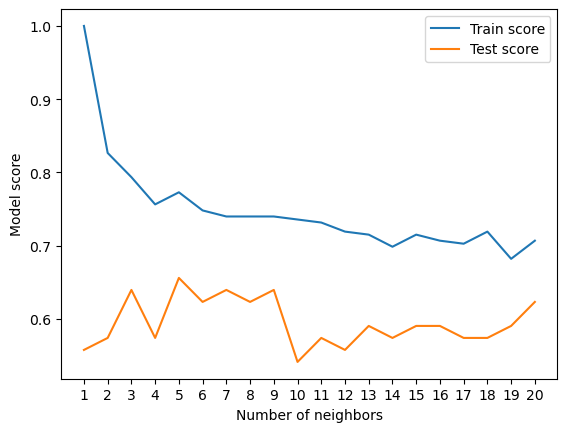

In [71]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV 

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [78]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [74]:
# Tune LogisticRegression

np.random.seed(34)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [75]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [76]:
rs_log_reg.score(x_test, y_test)

0.819672131147541

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [80]:
# Setup random seed
np.random.seed(23)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv = 5,
                               n_iter=20,
                               verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [81]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_depth': None}

In [82]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8032786885245902

In [84]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.7868852459016393}

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and imporve them again using GridSearchCV...

In [85]:
# Different hyperparameters for our LogisticRegressionModel
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [86]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [87]:
# Evaluate the grid search LogisticRegressionModel
gs_log_reg.score(x_test, y_test)

0.819672131147541

In [88]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.7868852459016393}

# Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

To make comparisons and evalute our trained model, first we need to make predictions

In [89]:
# Make predicions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

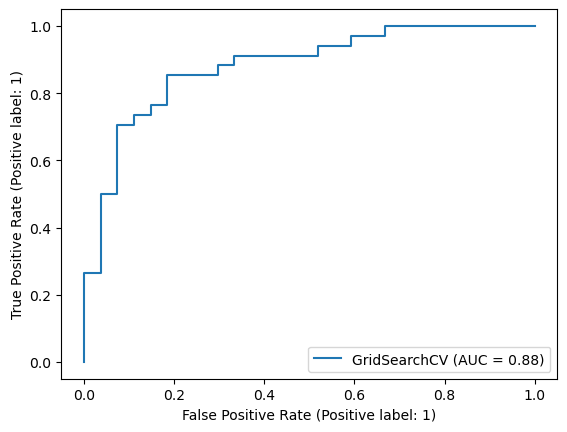

In [94]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [95]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[21  6]
 [ 5 29]]


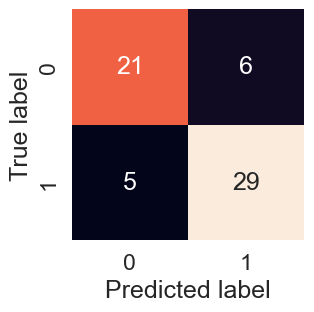

In [96]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
plot_conf_mat(y_test, y_preds)

Let's get classification report, cross-validated precision, recall and f1-score

In [97]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [98]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [99]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 9.236708571873866, 
                         solver= "liblinear")

In [100]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.83606557, 0.86666667, 0.71666667])

In [101]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8215846994535518

In [102]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8179096985548598

In [103]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8727272727272727

In [104]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8429665874032072

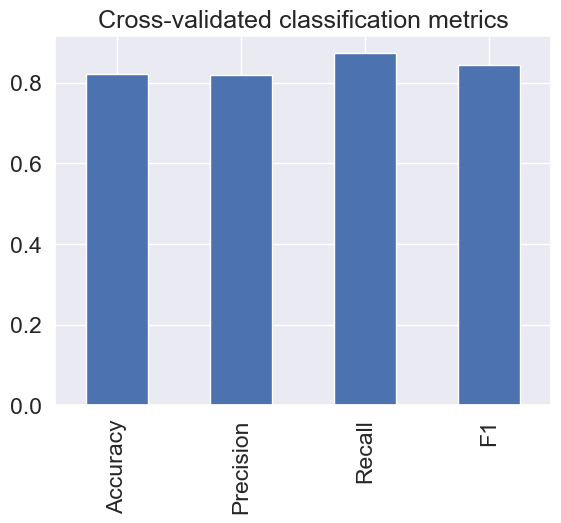

In [106]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### Feature Importance

It's an another way of asking "which features contributed most to the outcomes of the model and how did they contribute ?""

Finding feature importance is different for each machine learning model. One way to find features importance is to search for "(MODEL NAME) feature importance"

Let's find the feature importance for our LogisticRegression model...

In [108]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C = 9.236708571873866, 
                         solver = "liblinear")
clf.fit(x_train, y_train);

In [109]:
# Check coef_
clf.coef_

array([[-1.54501920e-03, -1.69955063e+00,  9.54540071e-01,
        -1.66599688e-02, -4.77244947e-03, -4.71284594e-01,
         6.54561288e-01,  3.57211722e-02, -5.06896590e-01,
        -6.38321574e-01,  2.66915703e-01, -7.58217946e-01,
        -1.14631605e+00]])

In [110]:
# Mathc coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.0015450191977698614,
 'sex': -1.6995506256581454,
 'cp': 0.9545400709501609,
 'trestbps': -0.016659968762851685,
 'chol': -0.004772449468154566,
 'fbs': -0.47128459415951174,
 'restecg': 0.6545612878899074,
 'thalach': 0.03572117221501542,
 'exang': -0.506896590473915,
 'oldpeak': -0.6383215735249729,
 'slope': 0.26691570283357813,
 'ca': -0.7582179458837474,
 'thal': -1.1463160462038857}

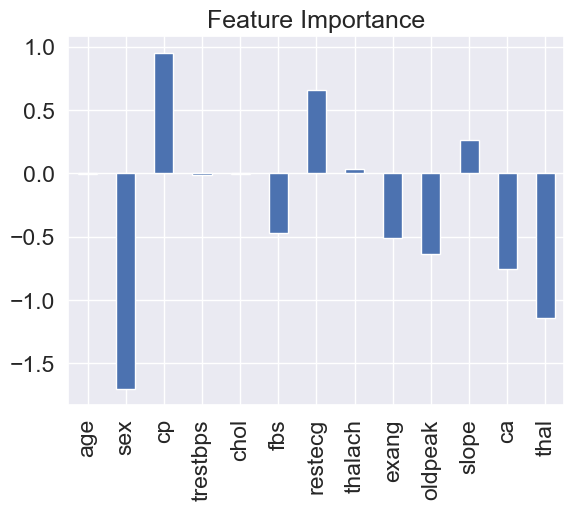

In [111]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [112]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping - better heart rate with exercise
* 1: Flatsloping - minimal change
* 2: Downslopings - signs of unhealthy heart